In [14]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import cv2

In [15]:
IMAGE_SIZE=256
BATCH_SIZE=32
EPOCHS=50

In [27]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "Siar-dataset",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE 
)

Found 6999 files belonging to 2 classes.


In [28]:
class_names=dataset.class_names

In [29]:
class_names

['Normal', 'Tumor']

In [30]:
for batch_image,label_image in dataset.take(1):
    print(batch_image.shape)
    print(label_image.numpy())

(32, 256, 256, 3)
[1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0]


(256, 256)


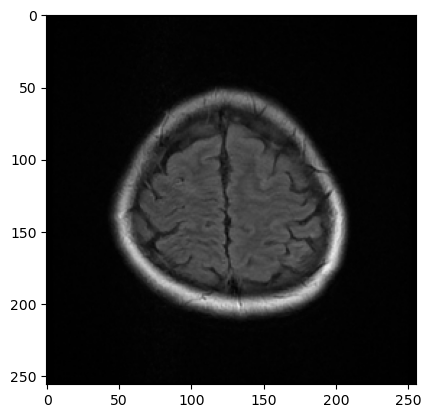

In [31]:
for  image_batch,label_batch in dataset.take(1):
    img = image_batch[0].numpy().astype("uint8")
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    print(gray_img.shape)
    plt.imshow(img)

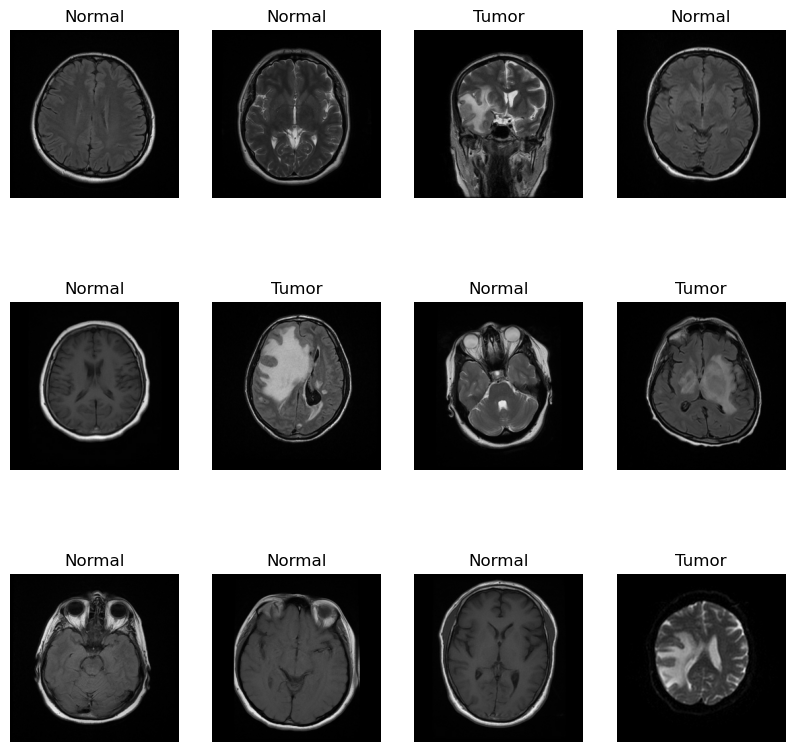

In [32]:
plt.figure(figsize=(10,10))
for  image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [45]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [48]:
import splitfolders
splitfolders.ratio('Siar-dataset',output="data", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 6999 files [00:14, 496.23 files/s]


In [51]:
import cv2
import os


train_dataset_path = "C:\\Users\\omsan\\data"


def sharpen_image(image):
    
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(image, (0, 0), 3)
    sharpened = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)
    return sharpened


for root, dirs, files in os.walk(train_dataset_path):
    for file in files:
        if file.endswith(".jpg") or file.endswith(".png"):
            image_path = os.path.join(root, file)
            image = cv2.imread(image_path)
            sharpened_image = sharpen_image(image)
            cv2.imwrite(image_path, sharpened_image)

In [52]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [53]:
datagen=ImageDataGenerator(
rotation_range=30,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
vertical_flip=True,
width_shift_range=0.2,
height_shift_range=0.2,
fill_mode='constant'
)

In [54]:
img=image.img_to_array(img)

In [55]:
type(img)

numpy.ndarray

In [56]:
input_batch=img.reshape(1,256,256,3)

In [57]:
i=0
for output in datagen.flow(input_batch,batch_size=1,save_to_dir='Untitled Folder 1'):
    i=i+1
    
    if i==10:
        break

In [58]:
import os
from keras.preprocessing.image import ImageDataGenerator

dataset_path = "C:\\Users\\omsan\\data\\train"

# Define the augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='constant'
)

# Define batch size
batch_size = 16

# Generate augmented images for each class
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
#     print(os.listdir(class_path))
    if os.path.isdir(class_path):
        output_dir = os.path.join('augmented_dataset2', class_name)
        os.makedirs(output_dir, exist_ok=True)

        class_datagen = datagen.flow_from_directory(
            dataset_path,
            target_size=(256, 256),  
            batch_size=batch_size,
            class_mode=None,
            save_to_dir=output_dir,
            save_prefix='augmented',
            save_format='jpg'
        )

        num_images = len(os.listdir(class_path))
        num_batches = num_images // batch_size + 1

        for i in range(num_batches):
            batch = class_datagen.next()

print("Data augmentation completed and augmented images are stored in separate folders.")


Found 5599 images belonging to 2 classes.
Found 5599 images belonging to 2 classes.
Data augmentation completed and augmented images are stored in separate folders.


In [59]:
# Images after Sharpening

In [64]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "Data//train",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE 
)

Found 5599 files belonging to 2 classes.


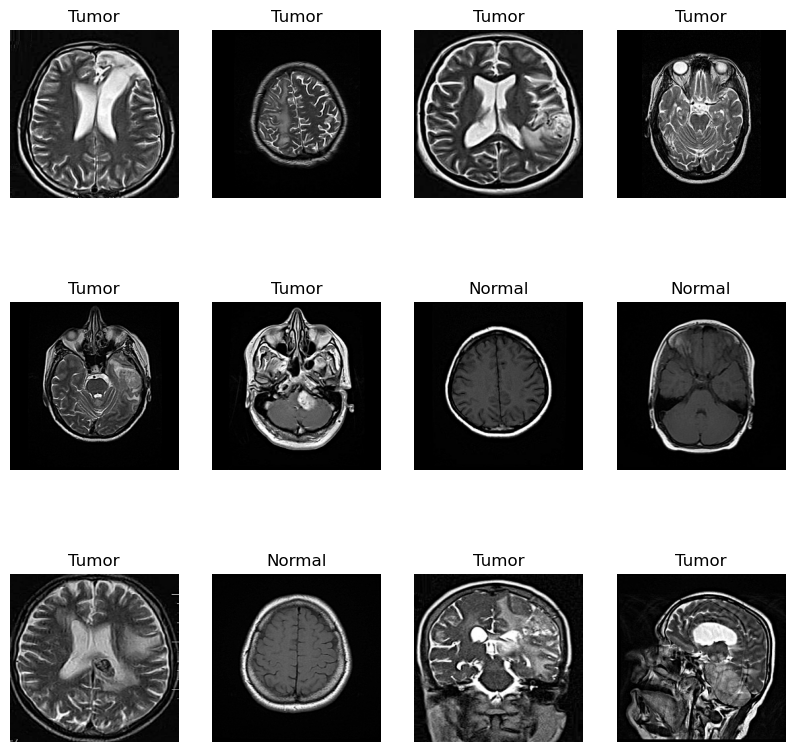

In [65]:
plt.figure(figsize=(10,10))
for  image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [ ]:
#Images after augmentation

In [66]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "augmented_dataset1",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE 
)

Found 11232 files belonging to 2 classes.


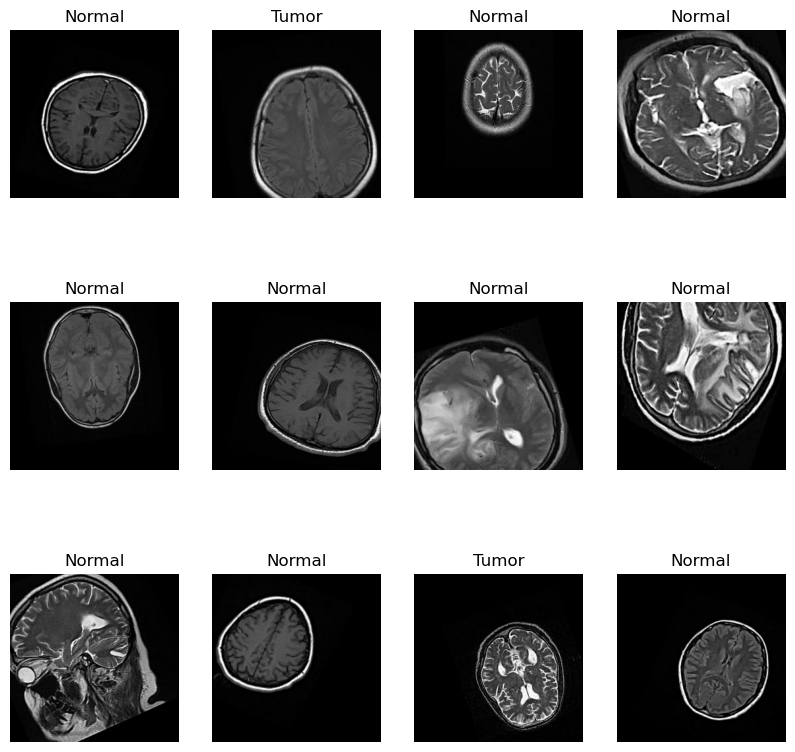

In [68]:
plt.figure(figsize=(10,10))
for  image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")